In [1]:
import pandas as pd
import math
import numpy as np
import pickle
import matplotlib.pyplot as plt

In [2]:
LaCrimeDF = pd.read_csv("LaCrime2.csv")
LaWeatherDF = pd.read_csv("LaWeather.csv")

In [3]:
LaCrimeDF.head()
# Raw Crime table


,DR_NO,Date Rptd,DATE OCC,TIME OCC,AREA,AREA NAME,Rpt Dist No,Part 1-2,Crm Cd,Crm Cd Desc,...,Status,Status Desc,Crm Cd 1,Crm Cd 2,Crm Cd 3,Crm Cd 4,LOCATION,Cross Street,LAT,LON
0,1307355,02/20/2010 12:00:00 AM,02/20/2010 12:00:00 AM,1350,13,Newton,1385,2,900,VIOLATION OF COURT ORDER,...,AA,Adult Arrest,900.0,NaN,NaN,NaN,300 E GAGE AV,NaN,33.9825,-118.2695
1,11401303,09/13/2010 12:00:00 AM,09/12/2010 12:00:00 AM,45,14,Pacific,1485,2,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",...,IC,Invest Cont,740.0,NaN,NaN,NaN,SEPULVEDA BL,MANCHESTER AV,33.9599,-118.3962
2,70309629,08/09/2010 12:00:00 AM,08/09/2010 12:00:00 AM,1515,13,Newton,1324,2,946,OTHER MISCELLANEOUS CRIME,...,IC,Invest Cont,946.0,NaN,NaN,NaN,1300 E 21ST ST,NaN,34.0224,-118.2524
3,90631215,01/05/2010 12:00:00 AM,01/05/2010 12:00:00 AM,150,6,Hollywood,646,2,900,VIOLATION OF COURT ORDER,...,IC,Invest Cont,900.0,998.0,NaN,NaN,CAHUENGA BL,HOLLYWOOD BL,34.1016,-118.3295
4,100100501,01/03/2010 12:00:00 AM,01/02/2010 12:00:00 AM,2100,1,Central,176,1,122,"RAPE, ATTEMPTED",...,IC,Invest Cont,122.0,NaN,NaN,NaN,8TH ST,SAN PEDRO ST,34.0387,-118.2488


In [4]:
LaWeatherDF.head()
# Raw Weather Table

,Station,Date,Time,Interval,Air max,Air max time,Air min,Air min time,Air avg,RH avg,Precip,Chill hrs,Hrs 32F,Hrs 85F,Hrs 95F
0,20140101,2400,1440,67,14:50,27,05:14,42,76,0.00,15.2,6.9,0.0,0.00,NaN
1,20140102,2400,1440,66,14:07,29,06:01,44,75,0.00,14.3,3.3,0.0,0.00,NaN
2,20140103,2400,1440,63,14:23,29,05:37,43,79,0.00,15.4,3.2,0.0,0.00,NaN
3,20140104,2400,1440,66,15:04,29,05:17,44,76,0.00,14.0,3.4,0.0,0.00,NaN
4,20140105,2400,1440,68,15:17,28,07:01,44,78,0.00,14.1,3.3,0.0,0.00,NaN


In [5]:
# Clean crime columns
# del LaCrimeDF["AREA"]
del LaCrimeDF["AREA NAME"]
del LaCrimeDF["Rpt Dist No"]
del LaCrimeDF["Crm Cd 2"]
del LaCrimeDF["Crm Cd 3"]
del LaCrimeDF["Crm Cd 4"]
del LaCrimeDF["LOCATION"]
del LaCrimeDF["Cross Street"]
del LaCrimeDF["LAT"]
del LaCrimeDF["Status"]
del LaCrimeDF["Status Desc"]
del LaCrimeDF["LON"]
del LaCrimeDF["Weapon Desc"]
del LaCrimeDF["Weapon Used Cd"] 
del LaCrimeDF["Premis Desc"]
del LaCrimeDF["Vict Descent"]
del LaCrimeDF["Vict Sex"]
del LaCrimeDF["Vict Age"]
del LaCrimeDF["Date Rptd"]
del LaCrimeDF["Part 1-2"]
del LaCrimeDF["DR_NO"]
LaCrimeDF.head()

,DATE OCC,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1
0,02/20/2010 12:00:00 AM,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0
1,09/12/2010 12:00:00 AM,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0
2,08/09/2010 12:00:00 AM,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0
3,01/05/2010 12:00:00 AM,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0
4,01/02/2010 12:00:00 AM,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0


In [6]:
# Clean Weather columns
# del LaWeatherDF["Station"]
del LaWeatherDF["Time"]
del LaWeatherDF["Date"]
del LaWeatherDF["Air max"]
del LaWeatherDF["Air min"]
del LaWeatherDF["RH avg"]
del LaWeatherDF["Precip"]
del LaWeatherDF["Chill hrs"]
del LaWeatherDF["Hrs 32F"]
del LaWeatherDF["Hrs 85F"]
del LaWeatherDF["Hrs 95F"]
del LaWeatherDF["Air avg"]


In [7]:
LaWeatherDF.rename(columns={'Station': 'Date', 'Interval': 'Temp Max','Air max time': 'Temp Min', 'Air min time':'Temp Avg'}, inplace=True)
LaWeatherDF.head()

,Date,Temp Max,Temp Min,Temp Avg
0,20140101,67,27,42
1,20140102,66,29,44
2,20140103,63,29,43
3,20140104,66,29,44
4,20140105,68,28,44


In [8]:
# for ind in LaCrimeDF.index:
#     take = LaCrimeDF.loc[ ind,'DATE OCC']
#     if((int(str(take)[6:-12]) < 2014) or (int(str(take)[6:-12]) > 2017)):
#         LaCrimeDF.drop(ind)

In [9]:
LaCrimeDF["Date"] = pd.to_datetime(LaCrimeDF["DATE OCC"]).dt.date
del LaCrimeDF["DATE OCC"]
LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date
0,1350,13,900,VIOLATION OF COURT ORDER,0913 1814 2000,501.0,900.0,2010-02-20
1,45,14,740,"VANDALISM - FELONY ($400 & OVER, ALL CHURCH VA...",0329,101.0,740.0,2010-09-12
2,1515,13,946,OTHER MISCELLANEOUS CRIME,0344,103.0,946.0,2010-08-09
3,150,6,900,VIOLATION OF COURT ORDER,1100 0400 1402,101.0,900.0,2010-01-05
4,2100,1,122,"RAPE, ATTEMPTED",0400,103.0,122.0,2010-01-02


In [10]:
year = []
month = []
day = []
for ind in LaWeatherDF.index:
    take = LaWeatherDF.loc[ ind,'Date']
    year.append(int(str(take)[:4]))
    month.append(int(str(take)[4:-2]))
    day.append(int(str(take)[6:]))
LaWeatherDF['Year'] = year
LaWeatherDF['Month'] = month
LaWeatherDF['Day'] = day
LaWeatherDF.head()        

,Date,Temp Max,Temp Min,Temp Avg,Year,Month,Day
0,20140101,67,27,42,2014,1,1
1,20140102,66,29,44,2014,1,2
2,20140103,63,29,43,2014,1,3
3,20140104,66,29,44,2014,1,4
4,20140105,68,28,44,2014,1,5


In [11]:
LaWeatherDF['DATE'] = LaWeatherDF['Year'].map(str) + '-' + LaWeatherDF['Month'].map(str) + '-' +  LaWeatherDF['Day'].map(str)
del LaWeatherDF['Date']
del LaWeatherDF['Year']
del LaWeatherDF['Month']
del LaWeatherDF['Day']
LaWeatherDF.head()

,Temp Max,Temp Min,Temp Avg,DATE
0,67,27,42,2014-1-1
1,66,29,44,2014-1-2
2,63,29,43,2014-1-3
3,66,29,44,2014-1-4
4,68,28,44,2014-1-5


In [12]:
LaWeatherDF["Date"] = pd.to_datetime(LaWeatherDF["DATE"]).dt.date

In [13]:

del LaWeatherDF['DATE']

In [14]:
LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day
LaWeatherDF["Report Month"] = pd.DatetimeIndex(LaWeatherDF["Date"]).month
LaWeatherDF["Report Year"] = pd.DatetimeIndex(LaWeatherDF["Date"]).year
LaWeatherDF["Report Day"] = pd.DatetimeIndex(LaWeatherDF["Date"]).day

In [15]:
LaWeatherDF= LaWeatherDF[~(LaWeatherDF['Report Year'] > 2017)]


In [16]:
LaCrimeDF = LaCrimeDF[~(LaCrimeDF['Report Year'] < 2014)]

In [17]:
LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)
offenseType =(LaCrimeDF["Crm Cd"].value_counts())

# errCount2 = LaCrimeDF['Crm Cd'].isin(offenseType[offenseType < 500].index)
# errCount = 0
# for x in errCount2:
#     if(x < 5000):
#        errCount += x 

In [18]:
LaCrimeDF = LaCrimeDF[~LaCrimeDF['Crm Cd'].isin(offenseType[offenseType < 96000].index)]
# # shw = LaCrimeDF[-LaCrimeDF['Crm Cd Desc'].isin(CrimeCategory[CrimeCategory < 15000].index)]
# print(errCount)

In [19]:
LaCrimeDF.head()


,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3
614224,1215,8,330,BURGLARY FROM VEHICLE,0344 1300 1609,108.0,330.0,2014-01-07,1,2014,7
804351,30,5,330,BURGLARY FROM VEHICLE,0344 1300 1609 1307 0216,108.0,330.0,2014-11-02,11,2014,2


In [20]:
CrimeCategory = LaCrimeDF["Crm Cd"].value_counts()
print(CrimeCategory)
LaCrimeDF.shape

624    110788
330     96965
Name: Crm Cd, dtype: int64


(207753, 11)

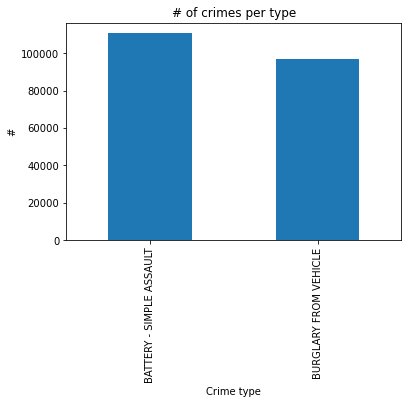

In [21]:
shw = LaCrimeDF[-LaCrimeDF['Crm Cd Desc'].isin(CrimeCategory[CrimeCategory < 15000].index)]
ax = (shw["Crm Cd Desc"].value_counts()).plot(title="# of crimes per type", kind = "bar")
ax.set_xlabel("Crime type")
ax.set_ylabel("#")
plt.xticks(rotation=90)
plt.show()

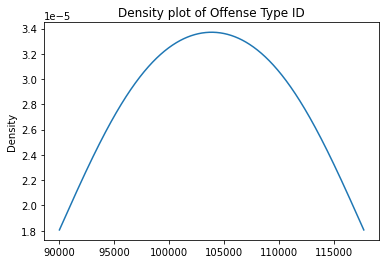

In [22]:
ax2 =(shw["Crm Cd Desc"].value_counts()).plot.kde(title="Density plot of Offense Type ID")

In [23]:
# LaCrimeDF["Report Month"] = pd.DatetimeIndex(LaCrimeDF["Date"]).month
# LaCrimeDF["Report Year"] = pd.DatetimeIndex(LaCrimeDF["Date"]).year
# LaCrimeDF["Report Day"] = pd.DatetimeIndex(LaCrimeDF["Date"]).day
# LaWeatherDF["Report Month"] = pd.DatetimeIndex(LaWeatherDF["Date"]).month
# LaWeatherDF["Report Year"] = pd.DatetimeIndex(LaWeatherDF["Date"]).year
# LaWeatherDF["Report Day"] = pd.DatetimeIndex(LaWeatherDF["Date"]).day

In [24]:
LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3
614224,1215,8,330,BURGLARY FROM VEHICLE,0344 1300 1609,108.0,330.0,2014-01-07,1,2014,7
804351,30,5,330,BURGLARY FROM VEHICLE,0344 1300 1609 1307 0216,108.0,330.0,2014-11-02,11,2014,2


In [25]:
# LaWeatherDF= LaWeatherDF[~(LaWeatherDF['Report Year'] > 2017)]


In [26]:
# LaCrimeDF = LaCrimeDF[~(LaCrimeDF['Report Year'] < 2014)]
LaCrimeDF.head()
# print(res)
# for ind in LaCrimeDF.index:
#     take = LaCrimeDF.loc[ind, 'Report Year']
#     if(int(str(take)) < 2014):
#         LaCrimeDF.drop(ind)

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Report Month,Report Year,Report Day
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,6,2014,2
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25,8,2014,25
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,1,2014,3
614224,1215,8,330,BURGLARY FROM VEHICLE,0344 1300 1609,108.0,330.0,2014-01-07,1,2014,7
804351,30,5,330,BURGLARY FROM VEHICLE,0344 1300 1609 1307 0216,108.0,330.0,2014-11-02,11,2014,2


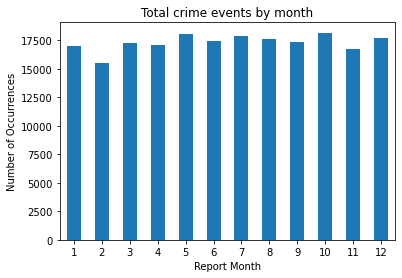

In [27]:
ax = LaCrimeDF.groupby("Report Month").size().plot(kind = "bar", title= "Total crime events by month")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

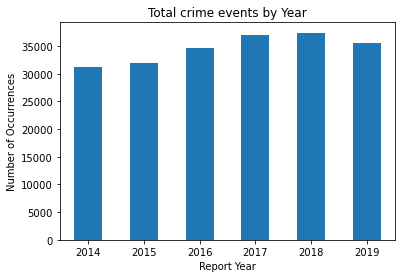

In [28]:
ax = LaCrimeDF.groupby("Report Year").size().plot(kind = "bar", title= "Total crime events by Year")
ax.set_ylabel("Number of Occurrences")
plt.xticks(rotation=0)
plt.show()

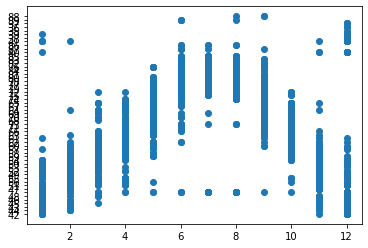

In [29]:
plt.scatter(LaWeatherDF["Report Month"], LaWeatherDF["Temp Avg"])
plt.show()

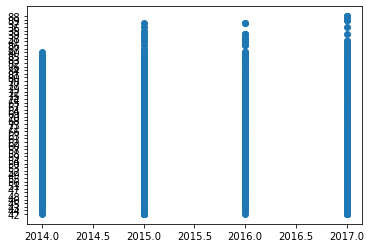

In [30]:
plt.scatter(LaWeatherDF["Report Year"], LaWeatherDF["Temp Avg"])
plt.show()

In [31]:
LaWeatherDF.info()
LaCrimeDF.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1461 entries, 0 to 1460
Data columns (total 7 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Temp Max      1461 non-null   object
 1   Temp Min      1461 non-null   object
 2   Temp Avg      1461 non-null   object
 3   Date          1461 non-null   object
 4   Report Month  1461 non-null   int64 
 5   Report Year   1461 non-null   int64 
 6   Report Day    1461 non-null   int64 
dtypes: int64(3), object(4)
memory usage: 91.3+ KB
<class 'pandas.core.frame.DataFrame'>
Int64Index: 207753 entries, 614215 to 2119796
Data columns (total 11 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   TIME OCC      207753 non-null  int64  
 1   AREA          207753 non-null  int64  
 2   Crm Cd        207753 non-null  int64  
 3   Crm Cd Desc   207753 non-null  object 
 4   Mocodes       207753 non-null  object 
 5   Premis Cd     207753 non-null  floa

In [32]:
# LaCrimeDF.nunique()
LaWeatherDF.nunique()

Temp Max          66
Temp Min          55
Temp Avg          56
Date            1461
Report Month      12
Report Year        4
Report Day        31
dtype: int64

In [33]:
LaWeatherDF.rename(columns={'DATE': 'Date'}, inplace=True)


In [34]:
del LaCrimeDF["Report Month"] 
del LaCrimeDF["Report Year"] 
del LaCrimeDF["Report Day"] 
del LaWeatherDF["Report Month"] 
del LaWeatherDF["Report Year"]
del LaWeatherDF["Report Day"] 
LaCrimeDF.dropna(inplace=True)
LaWeatherDF.dropna(inplace=True)


In [35]:
numofcrimes = len(LaCrimeDF.index)
print("Total Crimes:", numofcrimes)

numofweather = len(LaWeatherDF.index)
print("Weather Entries:", numofweather)

Total Crimes: 207753
Weather Entries: 1461


In [36]:

LaCrimeDF.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date
614215,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02
614217,2100,3,624,BATTERY - SIMPLE ASSAULT,0913 0416 0446 0429,501.0,624.0,2014-08-25
614219,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03
614224,1215,8,330,BURGLARY FROM VEHICLE,0344 1300 1609,108.0,330.0,2014-01-07
804351,30,5,330,BURGLARY FROM VEHICLE,0344 1300 1609 1307 0216,108.0,330.0,2014-11-02


In [37]:
LaWeatherDF.head()

,Temp Max,Temp Min,Temp Avg,Date
0,67,27,42,2014-01-01
1,66,29,44,2014-01-02
2,63,29,43,2014-01-03
3,66,29,44,2014-01-04
4,68,28,44,2014-01-05


In [38]:
LaMerged = pd.merge(LaCrimeDF, LaWeatherDF, how='outer', on = 'Date')


In [39]:
LaMerged.head()

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Temp Max,Temp Min,Temp Avg
0,1030,1,330,BURGLARY FROM VEHICLE,0344,123.0,330.0,2014-06-02,95,50,74
1,2050,2,624,BATTERY - SIMPLE ASSAULT,2004 1266 0416,701.0,624.0,2014-06-02,95,50,74
2,2200,4,330,BURGLARY FROM VEHICLE,1302 1210 0344,101.0,330.0,2014-06-02,95,50,74
3,2030,18,624,BATTERY - SIMPLE ASSAULT,2000 0416,501.0,624.0,2014-06-02,95,50,74
4,830,9,624,BATTERY - SIMPLE ASSAULT,0400 0417,704.0,624.0,2014-06-02,95,50,74


In [40]:
LaMerged["Temp Avg"] = pd.to_numeric(LaMerged["Temp Avg"], errors='coerce')

In [41]:
print(LaCrimeDF.dtypes)

TIME OCC         int64
AREA             int64
Crm Cd           int64
Crm Cd Desc     object
Mocodes         object
Premis Cd      float64
Crm Cd 1       float64
Date            object
dtype: object


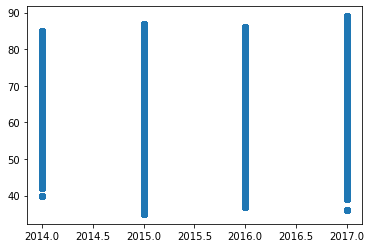

In [42]:
plt.scatter(pd.DatetimeIndex(LaMerged["Date"]).year, LaMerged["Temp Avg"])
plt.show()

In [43]:
temp = LaMerged['Temp Avg']
crimeType = LaMerged['Crm Cd'].unique()
Cold = LaMerged[LaMerged['Temp Avg'] < 45.0]
Hot = LaMerged[LaMerged['Temp Avg']  > 75.0]
Mild = LaMerged[(LaMerged['Temp Avg'] >= 45.0) & (LaMerged['Temp Avg']  <= 75.0)]
numofweathercrimes = len(LaMerged.index)
            

In [44]:
print(crimeType)

[330 624]


In [45]:
display(Cold)

,TIME OCC,AREA,Crm Cd,Crm Cd Desc,Mocodes,Premis Cd,Crm Cd 1,Date,Temp Max,Temp Min,Temp Avg
173,2345,13,624,BATTERY - SIMPLE ASSAULT,0400 0416,502.0,624.0,2014-01-03,63,29,43.0
174,300,3,624,BATTERY - SIMPLE ASSAULT,0400 0416,101.0,624.0,2014-01-03,63,29,43.0
175,2000,17,330,BURGLARY FROM VEHICLE,1607 0344,108.0,330.0,2014-01-03,63,29,43.0
176,1800,7,330,BURGLARY FROM VEHICLE,1300 0344,707.0,330.0,2014-01-03,63,29,43.0
177,1230,14,624,BATTERY - SIMPLE ASSAULT,0400 0419 1601,101.0,624.0,2014-01-03,63,29,43.0
...,...,...,...,...,...,...,...,...,...,...,...
133800,2200,18,330,BURGLARY FROM VEHICLE,1300 0344 1606,101.0,330.0,2017-12-06,63,27,42.0
133801,1,5,330,BURGLARY FROM VEHICLE,0344 0358 1300 1609 1307 0377,101.0,330.0,2017-12-06,63,27,42.0
133802,700,11,330,BURGLARY FROM VEHICLE,1609 0344,101.0,330.0,2017-12-06,63,27,42.0
133803,1430,1,330,BURGLARY FROM VEHICLE,1609 1307 0358 0344,707.0,330.0,2017-12-06,63,27,42.0


In [46]:
ldf = Hot



theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)


vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)


robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
# warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
# numofwarrant = len(warrant.index)
# theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
# numoftheft = len(theft.index)
# vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
# numofvandalism = len(vandalism.index)
# robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
# numofrobbery = len(robbery.index)
# burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
# numofburglary = len(burglary.index)
# arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
# numofarson = len(arson.index)
trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)

numcrimeproph = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimeproph/numofweathercrimes)*100), 2))

print("Crimes Against Property on Hot Days:", numcrimeproph)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
# print("vehicle:", numofwarrant)
print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)
# assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
# numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) + len(stalk2.index)



medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment = ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)

numcrimepersonh = numofassault + numofhomicide + numofkidnap + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonh/numofweathercrimes)*100), 2))

print("Crimes Against People on Hot Days:", numcrimepersonh)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)

print("stalking:", numofstalking)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()

Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother = len(other.index) + len(other2.index)

numcrimesocietyh = numofvio + numofthreat + numofother + numofdsp 

societypercent = str(round(((numcrimesocietyh/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Hot Days:", numcrimesocietyh)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

hotdaycrimetot = numcrimeproph + numcrimepersonh + numcrimesocietyh
print("Total Hot Day Crimes:", hotdaycrimetot) 



print("Percent of Weather Crimes:", (str(round((hotdaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Hot Days: 14631
Percent of Crimes: 7.04
Theft Crimes: 0
Vandalism Crimes: 0
Robbery Crimes: 0
trespassing: 0
Burglary Crimes: 14631
arson Crimes: 0
Weapon Possesion Crimes: 0
Fire Related Crimes: 0

Crimes Against People on Hot Days: 18097
Percent of Crimes: 8.71
Assault Crimes: 18097
homicide Crimes: 0
kidnap Crimes: 0
stalking: 0
Child: 0
Person Crimes: 0
Rape Crimes: 0

Crimes Against Society/Other on Hot Days: 0
Percent of Crimes: 0.0
Violations: 0
DISTURBING THE PEACE: 0
Threats: 0
Other: 0

Total Hot Day Crimes: 32728
Percent of Weather Crimes: 15.75


In [47]:
ldf = Mild



theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)


vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)
robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
# warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
# numofwarrant = len(warrant.index)
# theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
# numoftheft = len(theft.index)
# vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
# numofvandalism = len(vandalism.index)
# robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
# numofrobbery = len(robbery.index)
# burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
# numofburglary = len(burglary.index)
# arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
# numofarson = len(arson.index)
trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)




fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)


numcrimepropm = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimepropm/numofweathercrimes)*100), 2))

print("Crimes Against Property on Mild Days:", numcrimepropm)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
print("trespassing:", numoftrespassing)
# print("vehicle:", numofwarrant)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()


assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)
# assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
# numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) + len(stalk2.index)



medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment =  ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)

numcrimepersonm = numofassault + numofhomicide + numofkidnap + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonm/numofweathercrimes)*100), 2))

print("Crimes Against People on Mild Days:", numcrimepersonm)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)
print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()


Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other =ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother = len(other.index) + len(other2.index)


numcrimesocietym = numofvio + numofthreat + numofother + numofdsp + numofthreat

societypercent = str(round(((numcrimesocietym/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Mild Days:", numcrimesocietym)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()

milddaycrimetot = numcrimepropm + numcrimepersonm + numcrimesocietym

print("Total Mild Day Crimes:", milddaycrimetot)
print("Percent of Weather Crimes:", (str(round((milddaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Mild Days: 40358
Percent of Crimes: 19.43
Theft Crimes: 0
Vandalism Crimes: 0
Robbery Crimes: 0
trespassing: 0
Burglary Crimes: 40358
arson Crimes: 0
Weapon Possesion Crimes: 0
Fire Related Crimes: 0

Crimes Against People on Mild Days: 44798
Percent of Crimes: 21.56
Assault Crimes: 44798
homicide Crimes: 0
kidnap Crimes: 0
stalking: 0
Child: 0
Person Crimes: 0
Rape Crimes: 0

Crimes Against Society/Other on Mild Days: 0
Percent of Crimes: 0.0
Violations: 0
DISTURBING THE PEACE: 0
Threats: 0
Other: 0

Total Mild Day Crimes: 85156
Percent of Weather Crimes: 40.99


In [48]:
ldf = Cold




theft = ldf.loc[ldf['Crm Cd'] == 440].value_counts()
theft2 = ldf.loc[ldf['Crm Cd'] == 354].value_counts()
theft3 = ldf.loc[ldf['Crm Cd'] == 420].value_counts()
theft4 = ldf.loc[ldf['Crm Cd'] == 341].value_counts()
theft5 = ldf.loc[ldf['Crm Cd'] == 442].value_counts()
theft6 = ldf.loc[ldf['Crm Cd'] == 520].value_counts()
theft7 = ldf.loc[ldf['Crm Cd'] == 331].value_counts()
theft8 = ldf.loc[ldf['Crm Cd'] == 668].value_counts()
theft9 = ldf.loc[ldf['Crm Cd'] == 649].value_counts()
theft10 = ldf.loc[ldf['Crm Cd'] == 480].value_counts()
theft11 = ldf.loc[ldf['Crm Cd'] == 350].value_counts()
theft12 = ldf.loc[ldf['Crm Cd'] == 662].value_counts()

numoftheft = len(theft.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)

vandalism = ldf.loc[ldf['Crm Cd'] == 740].value_counts()
vandalism2 = ldf.loc[ldf['Crm Cd'] == 745].value_counts()

numofvandalism = len(vandalism.index) + len(vandalism2.index)

trespassing = ldf.loc[ldf['Crm Cd'] == 888].value_counts()
numoftrespassing = len(trespassing.index)

robbery = ldf.loc[ldf['Crm Cd'] == 210].value_counts()
robbery2 = ldf.loc[ldf['Crm Cd'] == 220].value_counts()

numofrobbery = len(robbery.index) + len(robbery2.index)


burglary = ldf.loc[ldf['Crm Cd'] == 330].value_counts()
burglary2 = ldf.loc[ldf['Crm Cd'] == 510].value_counts()
burglary3 = ldf.loc[ldf['Crm Cd'] == 310].value_counts()
burglary4 = ldf.loc[ldf['Crm Cd'] == 320].value_counts()

numofburglary = len(burglary.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = ldf.loc[ldf['Crm Cd'] == 648].value_counts()
numofarson = len(arson.index)

weap = ldf.loc[ldf['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
# warrant = ldf.loc[ldf['Crm Cd Desc'].str.contains("vehicle", case=False)]
# numofwarrant = len(warrant.index)
# theft = ldf.loc[ldf['Crm Cd Desc'].str.contains("theft", case=False)]
# numoftheft = len(theft.index)
# vandalism = ldf.loc[ldf['Crm Cd Desc'].str.contains("vandalism", case=False)]
# numofvandalism = len(vandalism.index)
# robbery = ldf.loc[ldf['Crm Cd Desc'].str.contains("robbery", case=False)]
# numofrobbery = len(robbery.index)
# burglary = ldf.loc[ldf['Crm Cd Desc'].str.contains("burglary", case=False)]
# numofburglary = len(burglary.index)
# arson = ldf.loc[ldf['Crm Cd Desc'].str.contains("arson", case=False)]
# numofarson = len(arson.index)
# trespassing = ldf.loc[ldf['Crm Cd Desc'].str.contains("trespassing", case=False)]
# numoftrespassing = len(trespassing.index)

fire = ldf.loc[ldf['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire = len(fire.index)


numcrimepropc = numofburglary + numofrobbery + numoftheft + numofarson + numofvandalism + numoffire + numoftrespassing + numofweap 

proppercent = str(round(((numcrimepropc/numofweathercrimes)*100), 2))

print("Crimes Against Property on Cold Days:", numcrimepropc)
print("Percent of Crimes:", proppercent)
print("Theft Crimes:", numoftheft)
print("Vandalism Crimes:", numofvandalism)
print("Robbery Crimes:", numofrobbery)
# print("vehicle:", numofwarrant)
print("trespassing:", numoftrespassing)
print("Burglary Crimes:", numofburglary)
print("arson Crimes:", numofarson)
print("Weapon Possesion Crimes:", numofweap)
print("Fire Related Crimes:", numoffire)
print()

assault = ldf.loc[ldf['Crm Cd'] == 624].value_counts()
assault2 = ldf.loc[ldf['Crm Cd'] == 626].value_counts()
assault3 = ldf.loc[ldf['Crm Cd'] == 230].value_counts()
assault4 = ldf.loc[ldf['Crm Cd'] == 860].value_counts()
assault5 = ldf.loc[ldf['Crm Cd'] == 236].value_counts()

numofassault = len(assault.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)
# assault = ldf.loc[ldf['Crm Cd Desc'].str.contains("assault", case=False)]
# numofassault = len(assault.index)
homicide = ldf.loc[ldf['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide = len(homicide.index)

kidnap = ldf.loc[ldf['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap = len(kidnap.index)

stalking = ldf.loc[ldf['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = ldf.loc[ldf['Crm Cd'] == 956].value_counts()
numofstalking = len(stalking.index) + len(stalk2.index)



medical = ldf.loc[ldf['Crm Cd'] == 627].value_counts()
numofmedical = len(medical.index)

person = ldf.loc[ldf['Crm Cd Desc'].str.contains("person", case=False)]
numofperson = len(person.index)

harassment =  ldf.loc[ldf['Crm Cd'] == 121].value_counts()
numofharass = len(harassment.index)


numcrimepersonc = numofassault + numofhomicide + numofkidnap  + numofmedical + numofperson + numofharass + numofstalking 

peoplepercent = str(round(((numcrimepersonc/numofweathercrimes)*100), 2))

print("Crimes Against People on Cold Days:", numcrimepersonc)
print("Percent of Crimes:", peoplepercent)
print("Assault Crimes:", numofassault)
print("homicide Crimes:", numofhomicide)
print("kidnap Crimes:", numofkidnap)
print("stalking:", numofstalking)

print("Child:", numofmedical)
print("Person Crimes:", numofperson)
print("Rape Crimes:", numofharass)
print()



Violations =  ldf.loc[ldf['Crm Cd'] == 900].value_counts()
Violations2 =  ldf.loc[ldf['Crm Cd'] == 901].value_counts()
numofvio = len(Violations.index) + len(Violations2.index)

threat = ldf.loc[ldf['Crm Cd'] == 930].value_counts()
threat2 = ldf.loc[ldf['Crm Cd'] == 761].value_counts()

numofthreat = len(threat.index) + len(threat2.index)

dsp = ldf.loc[ldf['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp = len(dsp.index)

other = ldf.loc[ldf['Crm Cd Desc'].str.contains("other", case=False)]
other2 = ldf.loc[ldf['Crm Cd'] == 946].value_counts()
numofother = len(other.index) + len(other2.index)

numcrimesocietyc = numofvio + numofthreat + numofother + numofdsp

societypercent = str(round(((numcrimesocietyc/numofweathercrimes)*100), 2))

print("Crimes Against Society/Other on Cold Days:", numcrimesocietyc)
print("Percent of Crimes:", societypercent)
print("Violations:", numofvio)
print("DISTURBING THE PEACE:", numofdsp)
print("Threats:", numofthreat)
print("Other:", numofother)
print()


colddaycrimetot = numcrimepropc + numcrimepersonc + numcrimesocietyc
print("Total Cold Day Crimes:", colddaycrimetot)

print("Percent of Weather Crimes:", (str(round((colddaycrimetot/numofweathercrimes)*100,2))))

Crimes Against Property on Cold Days: 5004
Percent of Crimes: 2.41
Theft Crimes: 0
Vandalism Crimes: 0
Robbery Crimes: 0
trespassing: 0
Burglary Crimes: 5004
arson Crimes: 0
Weapon Possesion Crimes: 0
Fire Related Crimes: 0

Crimes Against People on Cold Days: 4598
Percent of Crimes: 2.21
Assault Crimes: 4598
homicide Crimes: 0
kidnap Crimes: 0
stalking: 0
Child: 0
Person Crimes: 0
Rape Crimes: 0

Crimes Against Society/Other on Cold Days: 0
Percent of Crimes: 0.0
Violations: 0
DISTURBING THE PEACE: 0
Threats: 0
Other: 0

Total Cold Day Crimes: 9602
Percent of Weather Crimes: 4.62


In [49]:
# weap1 = LaMerged.loc[LaMerged['Crm Cd'] == 756].value_counts()
# numofweap1 = len(weap1.index)
# theft1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("theft", case=False)]
# numoftheft1 = len(theft1.index)
# vandalism1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("vandalism", case=False)]
# numofvandalism1 = len(vandalism1.index)
# robbery1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("robbery", case=False)]
# numofrobbery1 = len(robbery1.index)
# burglary1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("burglary", case=False)]
# numofburglary1 = len(burglary1.index)
# arson1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("arson", case=False)]
# numofarson1 = len(arson1.index)
# trespassing1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("trespassing", case=False)]
# numoftrespassing1 = len(trespassing1.index)
# warrant1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("vehicle", case=False)]
# numofwarrant1 = len(warrant1.index)
fire1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("fire", case=False)]
numoffire1 = len(fire1.index)
theft1 = LaMerged.loc[LaMerged['Crm Cd'] == 440].value_counts()
theft2 = LaMerged.loc[LaMerged['Crm Cd'] == 354].value_counts()
theft3 = LaMerged.loc[LaMerged['Crm Cd'] == 420].value_counts()
theft4 = LaMerged.loc[LaMerged['Crm Cd'] == 341].value_counts()
theft5 = LaMerged.loc[LaMerged['Crm Cd'] == 442].value_counts()
theft6 = LaMerged.loc[LaMerged['Crm Cd'] == 520].value_counts()
theft7 = LaMerged.loc[LaMerged['Crm Cd'] == 331].value_counts()
theft8 = LaMerged.loc[LaMerged['Crm Cd'] == 668].value_counts()
theft9 = LaMerged.loc[LaMerged['Crm Cd'] == 649].value_counts()
theft10 = LaMerged.loc[LaMerged['Crm Cd'] == 480].value_counts()
theft11 = LaMerged.loc[LaMerged['Crm Cd'] == 350].value_counts()
theft12 = LaMerged.loc[LaMerged['Crm Cd'] == 662].value_counts()

numoftheft1 = len(theft1.index) +  len(theft2.index) + len(theft3.index) + len(theft4.index) + len(theft5.index) + len(theft6.index) + len(theft7.index) + len(theft8.index) + len(theft9.index) +  len(theft10.index)+  len(theft11.index)+  len(theft12.index)

vandalism1 = LaMerged.loc[LaMerged['Crm Cd'] == 740].value_counts()
vandalism2 = LaMerged.loc[LaMerged['Crm Cd'] == 745].value_counts()

numofvandalism1 = len(vandalism1.index) + len(vandalism2.index)

trespassing1 = LaMerged.loc[LaMerged['Crm Cd'] == 888].value_counts()
numoftrespassing1 = len(trespassing1.index)

robbery1 = LaMerged.loc[LaMerged['Crm Cd'] == 210].value_counts()
robbery2 = LaMerged.loc[LaMerged['Crm Cd'] == 220].value_counts()

numofrobbery1 = len(robbery1.index) + len(robbery2.index)


burglaryz = LaMerged.loc[LaMerged['Crm Cd'] == 330].value_counts()
burglary2 = LaMerged.loc[LaMerged['Crm Cd'] == 510].value_counts()
burglary3 = LaMerged.loc[LaMerged['Crm Cd'] == 310].value_counts()
burglary4 = LaMerged.loc[LaMerged['Crm Cd'] == 320].value_counts()

numofburglary1 = len(burglaryz.index) + len(burglary2.index) + len(burglary3.index) + len(burglary4.index)

arson = LaMerged.loc[LaMerged['Crm Cd'] == 648].value_counts()
numofarson1 = len(arson.index)

weap = LaMerged.loc[LaMerged['Crm Cd'] == 756].value_counts()
numofweap = len(weap.index)
# warrant1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("vehicle", case=False)]
# numofwarrant1 = len(warrant1.index)

numcrimeprop = numofburglary1 + numofrobbery1 + numoftheft1 + numofarson1 + numofvandalism1 + numoffire1 + numoftrespassing1

proppercent1 = (numcrimeprop/numofweathercrimes)


print("Percent of Crimes:", proppercent1 * 100)
print("Theft Crimes:", numoftheft1)
print("Vandalism Crimes:", numofvandalism1)
print("Robbery Crimes:", numofrobbery1)
print("trespassing:", numoftrespassing1)
print("Burglary Crimes:", numofburglary1)
print("arson Crimes:", numofarson1)
# print("vehicle:", numofwarrant1)
# print("Weapon Possesion Crimes:", numofweap1)
print("Fire Related Crimes:", numoffire1)
print(numcrimeprop)

Percent of Crimes: 28.877079994031373
Theft Crimes: 0
Vandalism Crimes: 0
Robbery Crimes: 0
trespassing: 0
Burglary Crimes: 59993
arson Crimes: 0
Fire Related Crimes: 0
59993


In [50]:
# assault1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("assault", case=False)]
# numofassault1 = len(assault1.index)
assaultz = LaMerged.loc[LaMerged['Crm Cd'] == 624].value_counts()
assault2 = LaMerged.loc[LaMerged['Crm Cd'] == 626].value_counts()
assault3 = LaMerged.loc[LaMerged['Crm Cd'] == 230].value_counts()
assault4 = LaMerged.loc[LaMerged['Crm Cd'] == 860].value_counts()
assault5 = LaMerged.loc[LaMerged['Crm Cd'] == 236].value_counts()

numofassault1 = len(assaultz.index) + len(assault2.index) + len(assault3.index) +  len(assault4.index) + len(assault5.index)
homicide1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("homicide", case=False)]
numofhomicide1 = len(homicide1.index)

kidnap1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("kidnap", case=False)]
numofkidnap1 = len(kidnap1.index)

stalking1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("stalking", case=False)]
stalk2 = LaMerged.loc[LaMerged['Crm Cd'] == 956].value_counts()
numofstalking1 = len(stalking1.index) + len(stalk2.index)


medical1 = LaMerged.loc[LaMerged['Crm Cd'] == 627].value_counts()
numofmedical1 = len(medical1.index)

person1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("person", case=False)]
numofperson1 = len(person1.index)

harassment1 =  LaMerged.loc[LaMerged['Crm Cd'] == 121].value_counts()
numofharass1 = len(harassment1.index)


numcrimeperson = numofassault1 + numofhomicide1 + numofkidnap1  + numofmedical1  + numofharass1 + numofstalking1 + numofperson1

peoplepercent1 = (numcrimeperson/numofweathercrimes)

print("Percent of Crimes:", peoplepercent1*100)
print("Assault Crimes:", numofassault1)
print("homicide Crimes:", numofhomicide1)
print("kidnap Crimes:", numofkidnap1)
print("stalking:", numofstalking1)

print("Child:", numofmedical1)
print("Person Crimes:", numofperson1)
print("Rape Crimes:", numofharass1)
print(numcrimeperson)


Percent of Crimes: 32.487136166505415
Assault Crimes: 67493
homicide Crimes: 0
kidnap Crimes: 0
stalking: 0
Child: 0
Person Crimes: 0
Rape Crimes: 0
67493


In [51]:
Violations1 = LaMerged.loc[LaMerged['Crm Cd'] == 900].value_counts()
Violations2 =  LaMerged.loc[LaMerged['Crm Cd'] == 901].value_counts()
numofvio1 = len(Violations1.index) + len(Violations2.index)

threat1 = LaMerged.loc[LaMerged['Crm Cd'] == 930].value_counts()
threat2 = LaMerged.loc[LaMerged['Crm Cd'] == 761].value_counts()

numofthreat1 = len(threat1.index) + len(threat2.index)

dsp1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("DISTURBING THE PEACE", case=False)]
numofdsp1 = len(dsp1.index)

other1 = LaMerged.loc[LaMerged['Crm Cd Desc'].str.contains("other", case=False)]
other2 = LaMerged.loc[LaMerged['Crm Cd'] == 946].value_counts()
numofother1 = len(other1.index) + len(other2.index)

numcrimesociety = numofvio1 + numofother1 + numofdsp1 + numofthreat1

societypercent1 = (numcrimesociety/numofweathercrimes)


print("Percent of Crimes:", societypercent1*100)
print("Violations:", numofvio1)
print("DISTURBING THE PEACE:", numofdsp1)
print("Threats:", numofthreat1)
print("Other:", numofother1)
print(numcrimesociety)


Percent of Crimes: 0.0
Violations: 0
DISTURBING THE PEACE: 0
Threats: 0
Other: 0
0


In [52]:
# total of crime on people 

numofmissing1 = len(LaMerged.index) - (numcrimeprop + numcrimeperson + numcrimesociety)

print("Number numcrimeprop:", numcrimeprop)
print("Number numcrimeperson:", numcrimeperson)
print("Number numcrimesociety:", numcrimesociety)
print("Number numofweathercrimes:", numofweathercrimes)
print("Number :", len(LaMerged.index))
print("Number Missing:", numofmissing1)
missingpercent = (numofmissing1/len(LaMerged.index))
print("Percent of Crimes Missing:", missingpercent*100)

Number numcrimeprop: 59993
Number numcrimeperson: 67493
Number numcrimesociety: 0
Number numofweathercrimes: 207753
Number : 207753
Number Missing: 80267
Percent of Crimes Missing: 38.63578383946321


In [53]:
numofcrimes5 = len(LaMerged.index)
numofcrimes6 = len(LaCrimeDF.index)
print("Total Crimes:", numofcrimes5)
print("Total Crimes:", numofcrimes6)

Total Crimes: 207753
Total Crimes: 207753
